In [48]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_openai import ChatOpenAI
from langgraph.checkpoint.memory import MemorySaver, InMemorySaver # we are using ram to store the states in producntion we are using the database 
from dotenv import load_dotenv

In [49]:
load_dotenv()

True

In [50]:
llm = ChatOpenAI()

In [51]:
class JokeState(TypedDict):
    topic : str
    joke : str
    explanation : str

In [52]:
def generate_joke(state:JokeState):
    prompt = f"generate a joke on the topic :{state['topic']}"

    response = llm.invoke(prompt).content

    return {'joke' : response}

In [53]:
def generate_explanation(state:JokeState):
    prompt = f"write an explanation for the joke - {state['joke']}"

    response = llm.invoke(prompt).content

    return { 'explanation' : response}

In [54]:
graph = StateGraph(JokeState)

graph.add_node('generate_joke',generate_joke)
graph.add_node('generate_explanation', generate_explanation)

graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke','generate_explanation')
graph.add_edge('generate_explanation',END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)

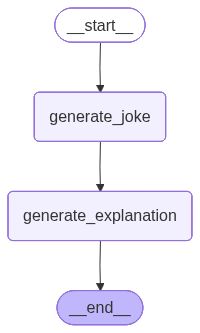

In [55]:
workflow

In [59]:
config1 = {"configurable" : {"thread_id" : "1"}}
workflow.invoke({"topic": 'baby boy '}, config=config1)

{'topic': 'baby boy ',
 'joke': "Why did the baby boy sit in the shade all day? Because he didn't want to be a sonburn!",
 'explanation': 'The joke plays on the words "sunburn" and "sonburn". Normally, people sit in the shade to avoid getting a sunburn from the sun\'s rays. However, in this joke, the baby boy sits in the shade all day because he didn\'t want to be a "sonburn" - a play on words combining "son" and "sunburn". It is a light-hearted pun that emphasizes the importance of protecting oneself from the sun.'}

In [60]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'baby boy ', 'joke': "Why did the baby boy sit in the shade all day? Because he didn't want to be a sonburn!", 'explanation': 'The joke plays on the words "sunburn" and "sonburn". Normally, people sit in the shade to avoid getting a sunburn from the sun\'s rays. However, in this joke, the baby boy sits in the shade all day because he didn\'t want to be a "sonburn" - a play on words combining "son" and "sunburn". It is a light-hearted pun that emphasizes the importance of protecting oneself from the sun.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0f4398-9b04-647a-8006-fcda72c2010b'}}, metadata={'source': 'loop', 'step': 6, 'parents': {}}, created_at='2026-01-18T06:47:20.882886+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0f4398-90e9-6a92-8005-78fea0bbc197'}}, tasks=(), interrupts=())

In [62]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'baby boy ', 'joke': "Why did the baby boy sit in the shade all day? Because he didn't want to be a sonburn!", 'explanation': 'The joke plays on the words "sunburn" and "sonburn". Normally, people sit in the shade to avoid getting a sunburn from the sun\'s rays. However, in this joke, the baby boy sits in the shade all day because he didn\'t want to be a "sonburn" - a play on words combining "son" and "sunburn". It is a light-hearted pun that emphasizes the importance of protecting oneself from the sun.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0f4398-9b04-647a-8006-fcda72c2010b'}}, metadata={'source': 'loop', 'step': 6, 'parents': {}}, created_at='2026-01-18T06:47:20.882886+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0f4398-90e9-6a92-8005-78fea0bbc197'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'baby boy ', 'joke': "Why did the 

In [63]:
config2 = {"configurable" : {"thread_id" : "2"}}
workflow.invoke({'topic': "pasta"}, config=config2 )

{'topic': 'pasta',
 'joke': 'Why did the penne blush? Because it saw the fettuccine Alfredo!',
 'explanation': "This joke is a play on words and a pun. Penne is a type of pasta that is shaped like a small tube, and Alfredo is a creamy white sauce often served with fettuccine pasta. In this joke, the penne pasta is said to blush (or turn red) because it saw the fettuccine Alfredo, implying that the penne pasta is embarrassed or flustered by seeing the fettuccine with the Alfredo sauce. It's a light-hearted and silly joke that plays on the idea of pasta having human-like emotions."}

In [64]:
workflow.get_state(config2)

StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the penne blush? Because it saw the fettuccine Alfredo!', 'explanation': "This joke is a play on words and a pun. Penne is a type of pasta that is shaped like a small tube, and Alfredo is a creamy white sauce often served with fettuccine pasta. In this joke, the penne pasta is said to blush (or turn red) because it saw the fettuccine Alfredo, implying that the penne pasta is embarrassed or flustered by seeing the fettuccine with the Alfredo sauce. It's a light-hearted and silly joke that plays on the idea of pasta having human-like emotions."}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0f43a7-7e92-611b-8002-3ae9bad2f1dd'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-18T06:54:00.553282+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0f43a7-6fec-6466-8001-3529c34c481c'}}, tasks=(), interrupts=())

In [65]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the penne blush? Because it saw the fettuccine Alfredo!', 'explanation': "This joke is a play on words and a pun. Penne is a type of pasta that is shaped like a small tube, and Alfredo is a creamy white sauce often served with fettuccine pasta. In this joke, the penne pasta is said to blush (or turn red) because it saw the fettuccine Alfredo, implying that the penne pasta is embarrassed or flustered by seeing the fettuccine with the Alfredo sauce. It's a light-hearted and silly joke that plays on the idea of pasta having human-like emotions."}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0f43a7-7e92-611b-8002-3ae9bad2f1dd'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-18T06:54:00.553282+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0f43a7-6fec-6466-8001-3529c34c481c'}}, tasks=(), interrupts=()),
 

## Time Travel

In [66]:
workflow.get_state({"configurable" : {"thread_id" : "2"},"checkpoint_id":"1f0f43a7-655e-6b07-8000-dae47c7a61f3"})

StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the penne blush? Because it saw the fettuccine Alfredo!', 'explanation': "This joke is a play on words and a pun. Penne is a type of pasta that is shaped like a small tube, and Alfredo is a creamy white sauce often served with fettuccine pasta. In this joke, the penne pasta is said to blush (or turn red) because it saw the fettuccine Alfredo, implying that the penne pasta is embarrassed or flustered by seeing the fettuccine with the Alfredo sauce. It's a light-hearted and silly joke that plays on the idea of pasta having human-like emotions."}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0f43a7-7e92-611b-8002-3ae9bad2f1dd'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-18T06:54:00.553282+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0f43a7-6fec-6466-8001-3529c34c481c'}}, tasks=(), interrupts=())

In [ ]:
workflow.invoke(None, {"configurable" : {"thread_id" : "2"},"checkpoint_id":"1f0f43a7-655e-6b07-8000-dae47c7a61f3"})

{'topic': 'pasta',
 'joke': 'Why did the pasta chef go to therapy? Because he had too much emotional baggage-lini!',
 'explanation': 'This joke plays on the similarity between the word "tagliatelle" (a type of pasta) and the word "baggage." The pun is that the pasta chef went to therapy because he had too much "emotional baggage-lini," referring to "tagliatelle" as both pasta and emotional baggage. The humor comes from the unexpected connection between pasta and therapy, making it a light-hearted and silly play on words.'}

In [68]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the pasta chef go to therapy? Because he had too much emotional baggage-lini!', 'explanation': 'This joke plays on the similarity between the word "tagliatelle" (a type of pasta) and the word "baggage." The pun is that the pasta chef went to therapy because he had too much "emotional baggage-lini," referring to "tagliatelle" as both pasta and emotional baggage. The humor comes from the unexpected connection between pasta and therapy, making it a light-hearted and silly play on words.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0f43eb-fee1-6df0-8002-b4ebf9bf690e'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-18T07:24:39.368835+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0f43eb-ef26-6479-8001-c7fe677fe572'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did th

## Update State

```python

In [70]:
workflow.update_state({"configurable" : {"thread_id" : "2"},"checkpoint_id":"1f0f43a7-655e-6b07-8000-dae47c7a61f3", 'checkpoint_ns': ""}, {'topic': 'Dosa'})

{'configurable': {'thread_id': '2',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0f43f7-56c2-60e3-8001-e46bc7a2cd9d'}}

In [71]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'Dosa'}, next=('generate_joke',), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0f43f7-56c2-60e3-8001-e46bc7a2cd9d'}}, metadata={'source': 'update', 'step': 1, 'parents': {}}, created_at='2026-01-18T07:29:43.862280+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0f43a7-655e-6b07-8000-dae47c7a61f3'}}, tasks=(PregelTask(id='2daa4818-9dad-de32-4a15-7d09ca0df80d', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the pasta chef go to therapy? Because he had too much emotional baggage-lini!', 'explanation': 'This joke plays on the similarity between the word "tagliatelle" (a type of pasta) and the word "baggage." The pun is that the pasta chef went to therapy because he had too much "emotional baggage-lini," referring to "tagliatell

In [72]:
workflow.invoke(None, {"configurable" : {"thread_id" : "2"},"checkpoint_id":"1f0f43f7-56c2-60e3-8001-e46bc7a2cd9d"})

{'topic': 'Dosa',
 'joke': 'Why did the dosa go to therapy? \nBecause it had too many layers to deal with!',
 'explanation': 'This joke is a play on words, using the term "layers" in a humorous way. In this context, "layers" refers to the multiple thin crepes that make up a dosa, a traditional Indian dish. The joke suggests that the dosa went to therapy because it had too many layers to deal with, implying that the dosa was struggling to cope with its own complexity. This joke is meant to be lighthearted and playful, providing a humorous take on the idea of a dosa seeking therapy for its problems.'}

In [73]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'Dosa', 'joke': 'Why did the dosa go to therapy? \nBecause it had too many layers to deal with!', 'explanation': 'This joke is a play on words, using the term "layers" in a humorous way. In this context, "layers" refers to the multiple thin crepes that make up a dosa, a traditional Indian dish. The joke suggests that the dosa went to therapy because it had too many layers to deal with, implying that the dosa was struggling to cope with its own complexity. This joke is meant to be lighthearted and playful, providing a humorous take on the idea of a dosa seeking therapy for its problems.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0f43fd-003f-6012-8003-eafab38da22d'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2026-01-18T07:32:15.852122+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0f43fc-f293-67ce-8002-553f7fddcf05'}}, tasks=()